# Prediction using Unsupervised ML 
In ‘Iris’ dataset, predict the optimum number of  clusters and represent it visually. <br><br>
<b>Submitted by:</b> <h3>Mohamed Jafir Ashraf</h3>

In [26]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [27]:
import warnings
warnings.filterwarnings 

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [28]:
#load the data
df = pd.read_csv('iris.csv', index_col=False)

In [29]:
df.set_index('Id', inplace=True)

In [30]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [33]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Exploratory Data Analysis

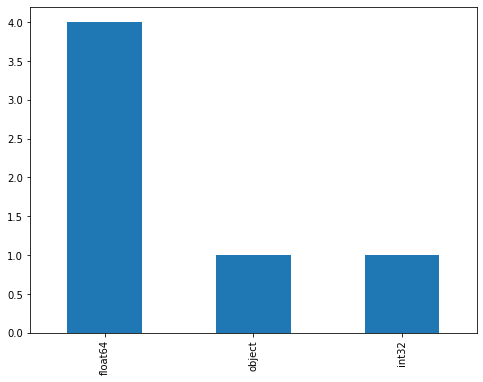

In [62]:
#Count the Data type 
fig = plt.figure(1, figsize=(8, 6))
df.dtypes.value_counts().plot(kind='bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021DE183CB70>,
      dtype=object)

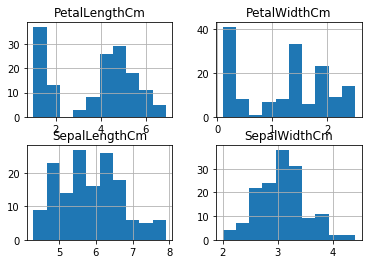

In [61]:
df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].hist()

Text(0, 0.5, 'Width')

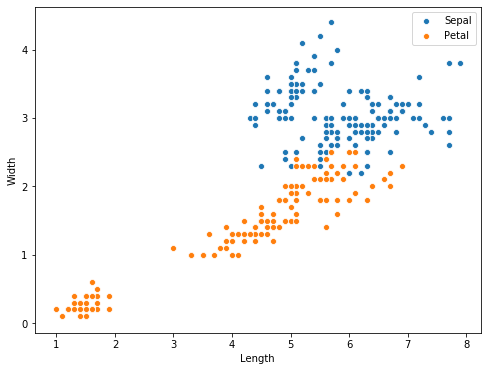

In [59]:
#scatter plot
fig = plt.figure(1, figsize=(8, 6))
sns.scatterplot(x='SepalLengthCm', y ='SepalWidthCm', data=df, label='Sepal')
sns.scatterplot(x='PetalLengthCm', y ='PetalWidthCm', data=df, label='Petal')
plt.xlabel('Length')
plt.ylabel('Width')

In [37]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


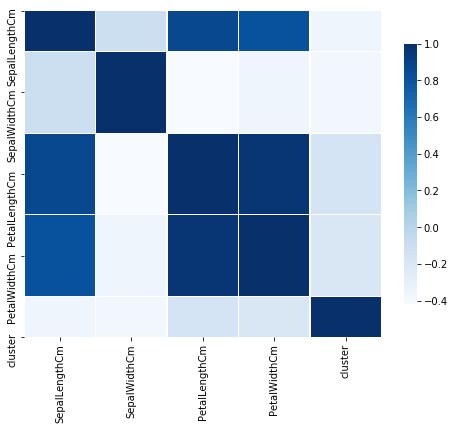

In [63]:
fig = plt.figure(1, figsize=(8, 6))
sns.heatmap(df.corr(),cmap="Blues", linewidth=0.3, cbar_kws={"shrink": .8})

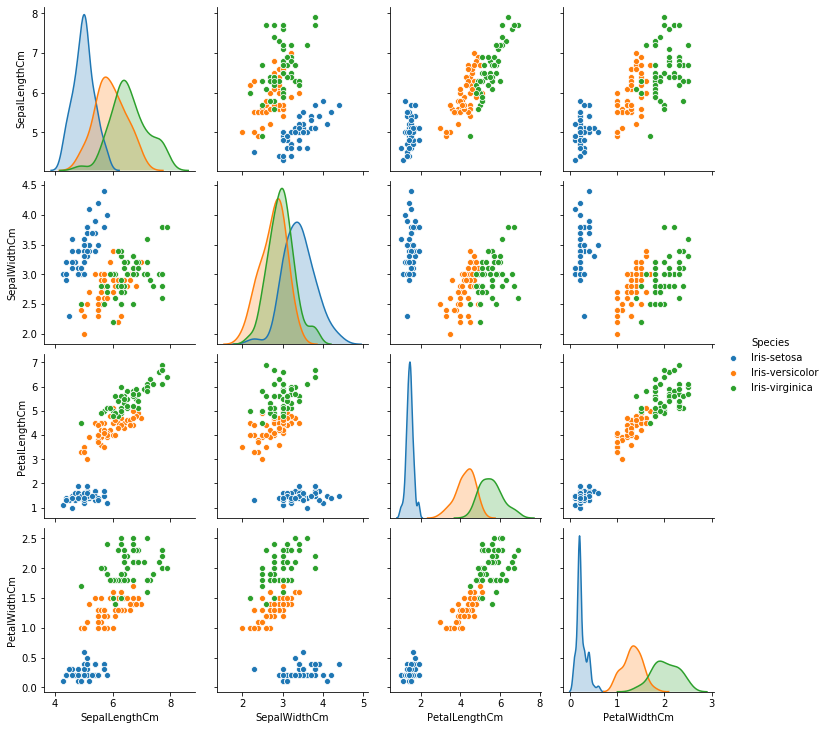

In [39]:
sns.pairplot(df, hue='Species')

### Elbow Method

In [40]:
from sklearn.cluster import KMeans

x = df.iloc[:, [0, 1, 2, 3]].values

sse = []
k_rng = range(1,11)
for k in k_rng:
    km = KMeans(n_clusters=k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    sse.append(km.inertia_)

Text(0, 0.5, 'Sum of Squared Error')

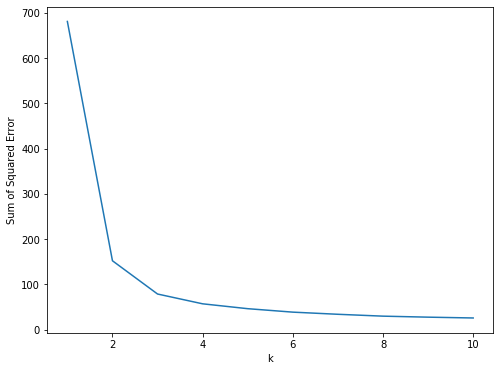

In [57]:
fig = plt.figure(1, figsize=(8, 6))
plt.plot(k_rng, sse)
plt.xlabel('k')
plt.ylabel('Sum of Squared Error')

### Predictive Modeling

In [42]:
km = KMeans(n_clusters=3)
km_pred = km.fit_predict(x)
km_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [43]:
km.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [44]:
df['cluster'] = km_pred

In [45]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,1
2,4.9,3.0,1.4,0.2,Iris-setosa,1
3,4.7,3.2,1.3,0.2,Iris-setosa,1
4,4.6,3.1,1.5,0.2,Iris-setosa,1
5,5.0,3.6,1.4,0.2,Iris-setosa,1


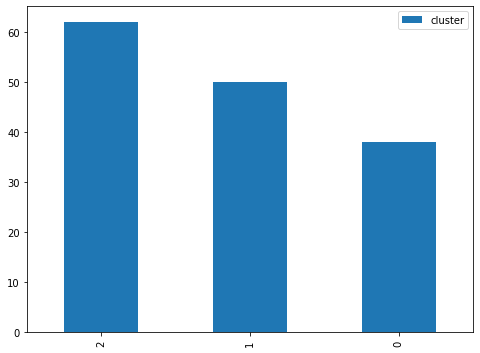

In [56]:
fig = plt.figure(1, figsize=(8, 6))
df['cluster'].value_counts().plot(kind='bar')
plt.legend()

### Final Visualization

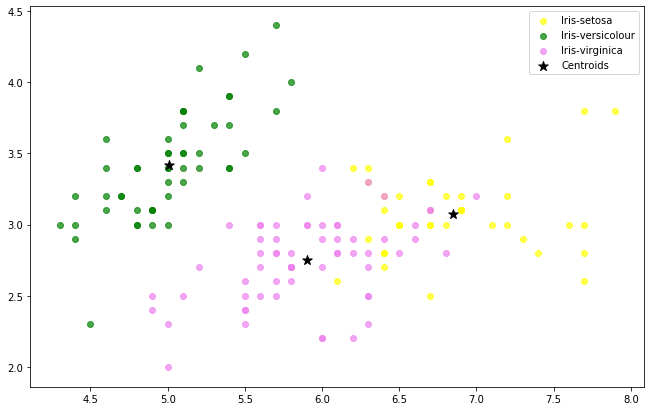

In [47]:
#2D visual of the final prediction
fig = plt.figure(1, figsize=(11, 7))
plt.scatter(x[km_pred == 0, 0], x[km_pred == 0, 1], alpha=0.7, label = 'Iris-setosa', color='yellow')
plt.scatter(x[km_pred == 1, 0], x[km_pred == 1, 1], alpha=0.7, label = 'Iris-versicolour', color='green')
plt.scatter(x[km_pred == 2, 0], x[km_pred == 2, 1], alpha=0.7, label = 'Iris-virginica', color='violet')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 100, marker='*', c='black', label = 'Centroids')

plt.legend()

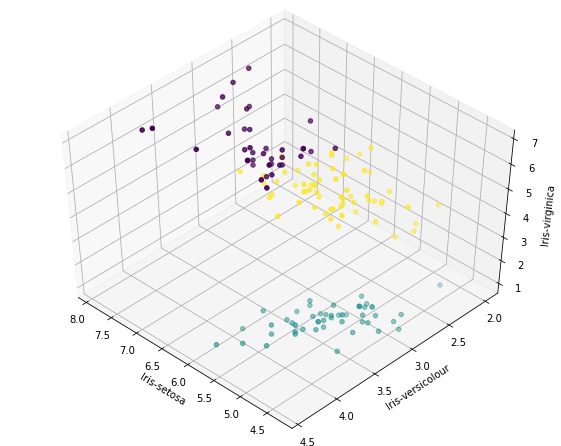

In [54]:
#3D visual of the final prediction
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()

ax.set_xlabel('Iris-setosa')
ax.set_ylabel('Iris-versicolour')
ax.set_zlabel('Iris-virginica')

ax.scatter(x[:, 0], x[:, 1], x[:, 2], x[:,3], c= km_pred.astype(np.float))

End of the notebook...